# Netflix Shows 
## Business Introduction
Analyze the data and generate insights that could help Netflix decide which type of shows/movies to produce and how to grow the business.

The main variable analyzed will be the user rating score. We will analyze correlations and use graphs to show how feature variables effect the likability of a Netflix show. Certain feature variables analyzed will be such as the following:
* Level rating (ie. pg13, R, pg) 
* Release year
* Rating Description
* Description
------------------------
## View Netflix Data 
The original dataset can be found on Kaggle: https://www.kaggle.com/shivamb/netflix-shows . However, the first five rows with columns will be shown below in the next section.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read Files:
#netflix=r'/kaggle/input/netflix-showse/netflix.csv'
netflix=r'C:\Users\sschm\Desktop\Kaggle\netflix.csv'
data=pd.read_csv(netflix)
data=data.drop_duplicates() #Drop Duplicates:
data.head() #Display Data:

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [2]:
data.dtypes

title                 object
rating                object
ratingLevel           object
ratingDescription      int64
release year           int64
user rating score    float64
user rating size       int64
dtype: object

## Correlations and Heatmap
There are no highly correlated features that need to be removed.

AxesSubplot(0.125,0.125;0.62x0.755)
Highly correlated variables above:  0.0


,Correlation
ratingDescription and release year,0.361142
ratingDescription and user rating score,0.218829
release year and user rating score,0.200235
release year and user rating size,0.057330
ratingDescription and user rating size,-0.184752


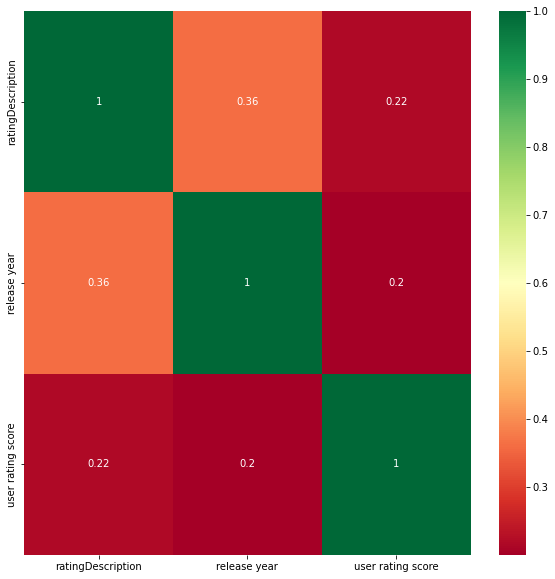

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = data.select_dtypes(include=numerics)

def printHeat():
    corr = df.corr()
    #print(corr)
    highly_corr_features = corr.index[abs(corr["user rating score"])>0.0]
    plt.figure(figsize=(10,10))
    heat = sns.heatmap(df[highly_corr_features].corr(),annot=True,cmap="RdYlGn")
    top10=corr["user rating score"].sort_values(ascending=False).head(10)
    print(heat)
    #print(top10) # top ten correlations

#print correlation between features
def printHighCorr(df, features, threshold=0.0):
    print("Highly correlated variables above: ", threshold)
    corr_df = df[features].corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value
    correlation_df={}
    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            correlation_df[corr_df.index[i] +" and "+ corr_df.columns[j]]= v
        correlation_df=pd.DataFrame(correlation_df,index=['Correlation'])
    return  correlation_df.T.sort_values(by='Correlation',ascending=False)

#Turn off functions on or off:
printHeat() 
printHighCorr(data,data.columns).style.set_properties(**{'background-color': 'black','color': 'white'})

### Drop NaN values from user rating score column
Since user rating score is the main feature we are trying to analyze, we must delete those rows. There are a few ratingLevel values missing which are also deleted because we will need to analyze that data later on. We cannot easily use a mean for a ratingLevel since it is a string.

In [4]:
findNA=data.isnull().sum().sort_values(ascending=False)/len(data)
print(findNA)
df = data.dropna(subset=['user rating score', 'ratingLevel'])

user rating score    0.488
ratingLevel          0.066
title                0.000
rating               0.000
ratingDescription    0.000
release year         0.000
user rating size     0.000
dtype: float64


## Search for Outliers:
Since the last column is the size of the sample, I check all values for that column. If a certain movie has a very small sample size, that movie should be conisdered to be deleted. In this case, all the sample sizes were 80 so there are no outliers that need to be removed.

In [5]:
df['user rating size'].unique()

array([80], dtype=int64)

## Group Rating Level and Rating  
Neflix users emjoy the TV-MA, R, and TV-14 shows the most. This is not a huge surprise as most of the popular netflix shows tend to be for adult audience such as Squid Games, Breaking Bad, and The Walking Dead.


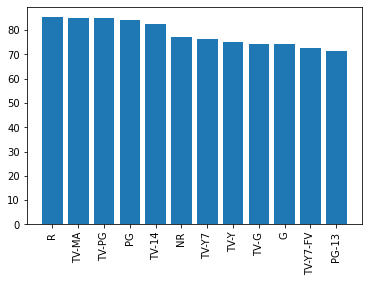

In [6]:
ratingGb=df.groupby('rating')['user rating score'].mean().sort_values(ascending=False).round(2).reset_index()

#Plot Rating Groupby:
x=ratingGb['rating']
y=ratingGb['user rating score']
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

## Group Movies by Year
The most liked movies are the most recent year from the data which happened to be 2017. However, there is little correlation, 0.5025 between year of the movie and how much customers enjoy a show. 

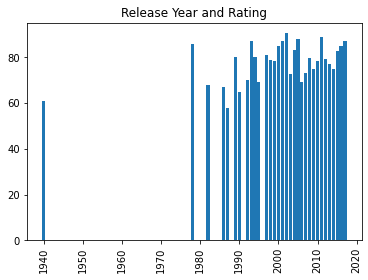

0.5019  The correlation between year and show rating.


In [7]:
yearGb=df.groupby('release year')['user rating score'].mean().round(2).reset_index()

#Plot year groupby:
x=yearGb['release year']
y=yearGb['user rating score']

plt.title('Release Year and Rating')
plt.xticks(rotation=90)
plt.bar(x,y)
plt.show()

#Find correlation:
corrYear=x.corr(y).round(4)
print(corrYear, " The correlation between year and show rating.")

## Analyze Movies by Description
We will now compare Netflix show ratings to other descriptions. Surprisingly, I found some interesting results that violent Netflix movies were the least favored:
* 81.3902  is the average Neftlix rating
* 80.2308  is the average sex Netflix rating
* 76.3636  is the average violent Netflix rating

There are no missing values for the Description column that we have to remove. Now, we will divide up movie themes by searching the DataFrame for certain criteria such as violence and/or sex.

In [8]:
avgRating=df['user rating score'].mean()
print(round(avgRating,4), " is the average Neftlix rating")

dfSex=df[df['ratingLevel'].str.contains("sex")].reset_index()
avgSex=dfSex['user rating score'].mean()
print(round(avgSex,4), " is the average sex Netflix rating")

dfV=df[df['ratingLevel'].str.contains("violence")].reset_index()
avgV=dfV['user rating score'].mean()
print(round(avgV,4), " is the average violent Netflix rating")

81.3902  is the average Neftlix rating
80.2308  is the average sex Netflix rating
76.3636  is the average violent Netflix rating


## Rating Description
The correlation between rating description and user rating score is 0.2216. This almost shows there is no correlation between these two features. This means we do not need to further analyze the rating description column.

In [9]:
rd=df['ratingDescription'].corr(df['user rating score'])
print(round(rd,4))

0.2216


## References
1. https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda#Movie-ratings-analysis